In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

In [2]:
# parent directory
parent_directory = os.path.dirname(os.getcwd())
path = parent_directory + '/Ensemble-Learning-XGboost/Data'
#read the data
data_train = pd.read_csv(path + '/train.csv')
data_test = pd.read_csv(path + '/test.csv')

### DATA QUALITY CHECKING

#### Check data types and Non-Null count

In [3]:
print(data_train.info())
print(data_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
None
(200000, 202)


In [4]:
print(data_test.info())
print(data_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB
None
(200000, 201)


In [5]:
data_train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
data_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


### MISSING DATA IMPUTATION

In [12]:
#check the missing values
print('Null values in training set: %3d ' %(data_train.isnull().sum().value_counts()))
#check duplicates
print('Duplicate records in training set : %3d' %data_train.duplicated().sum())
print('Duplicate records in test set: %3d'  %data_test.duplicated().sum())

Null values in training set: 202 
Duplicate records in training set :   0
Duplicate records in test set:   0


In [36]:
missing_cols = [colname for colname in data_train.columns[data_train.isnull().any()]]
for i in missing_cols:
    if data_train[i].isnull().sum() * 100 / len(data_train[i])>50:
        print(i,' ',data_train[i].isnull().sum() * 100 / len(df[i]))

In [33]:
data_train.fillna(value=0,inplace=True)

### EDA

In [22]:
data_X = data_train.drop(['ID_code','target'],axis=1).iloc[0:20001]
data_Y = data_train['target'].iloc[0:20001]
print('Shape of X: {}'.format(data_X.shape))
print('Shape of y: {}'.format(data_Y.shape))

Shape of X: (20001, 200)
Shape of y: (20001,)


#### Check correlation

<AxesSubplot:>

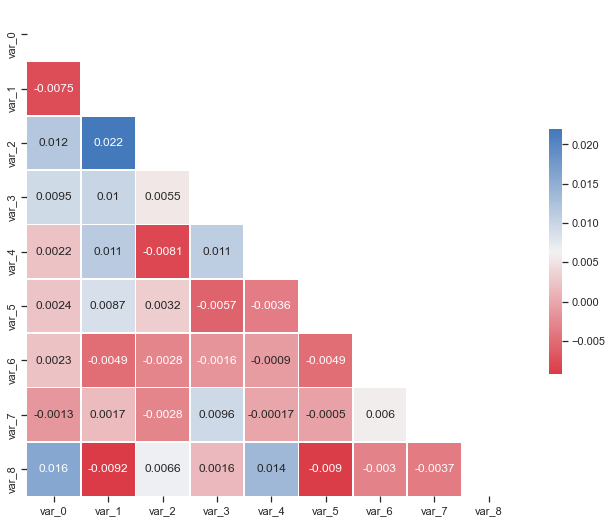

In [44]:
corr = data_X.corr()
mask = np.zeros_like(corr.iloc[0:9,0:9], dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr.iloc[0:9,0:9], mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)

<AxesSubplot:xlabel='target', ylabel='count'>

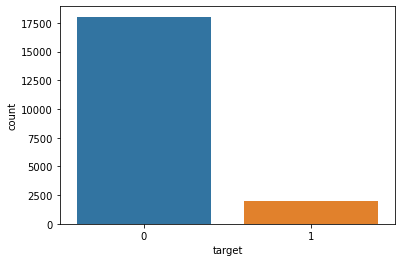

In [32]:
sns.countplot(x = data_Y)

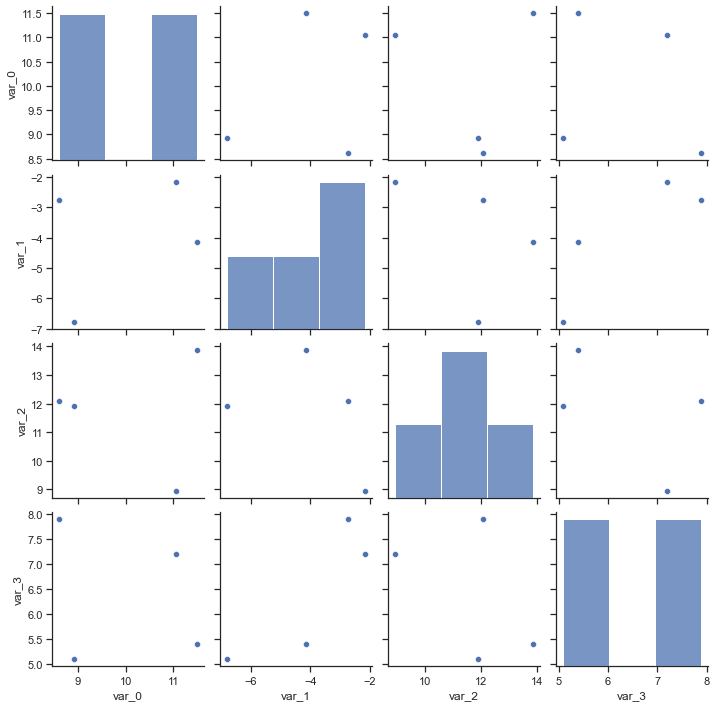

In [43]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_X.iloc[0:4,0:4])

C:\Users\Pc\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pc\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


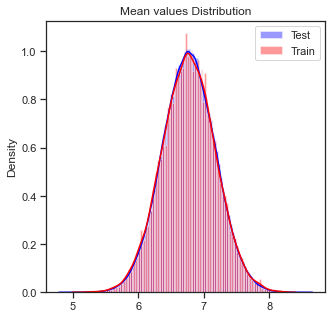

In [41]:
#Compare Mean values distribution of trainig and test set
data_Xtest=data_test.drop(['ID_code'],axis=1)
plt.figure(figsize=[5,5])
plt.title('Mean values Distribution')
sns.distplot(data_Xtest.mean(axis=1),color='blue',bins=120,label='Test')
sns.distplot(data_X.mean(axis=1), color='red',bins=120,label='Train')
plt.legend()
plt.show()

### FEATURE SELECTION